###

# Lorenzo Valentini Rlab-01

### Advanced statistics

In [1]:
# Requiring libraries libraries.
library(ggplot2)
library(dplyr)
library(readr)
library(tibble)
library(tidyr)
library(ggstream)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Exercise 1 - vectors and data frames
    • The table gives the volume, area, length and maximum and mean depths of some Scottish lakes.
    0 Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors.
    1 Evaluate the highest and lowest volume and area lake.
    2 Order the frame with respect to the area and determine the two largest area lakes.
    3 By summing up the areas occpupied by the lakes, determine the area of Scotland covered by water.

##### 1.0)
The dataframe is composed by the vectors filled with all the data.

In [2]:
# Making vectors for the dataframe.
loch <- c( 'Loch Ness', 'Loch Lomond', 'Loch Morar', 'Loch Tay', 'Loch Awe', 
           'Loch Maree', 'Loch Ericht', 'Loch Lochy', 'Loch Rannoch', 
           'Loch Shiel', 'Loch Katrine', 'Loch Arkaig', 'Loch Shin')
volume <-c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35)
area <- c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5)
length <- c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8)
max_depth <-c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49)
mean_depth <-c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)

In [3]:
# Putting together creating the dataframe and showing the dataframe
scottish.lakes = data.frame(loch, volume, area, length, max_depth, mean_depth)
scottish.lakes

loch,volume,area,length,max_depth,mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


##### 1.1-1.2)
The lake with the deisred characteristics is found by ordering the dataframe with respect to one column values and then by printing only the first(s) entry(ies).

In [4]:
# Ordering the dataframe by decreasing lake volume: the first entry is the biggest volume lake.
scottish.lakes[order(-scottish.lakes$volume),][1,]      


,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Loch Ness,7.45,56,39,230,132


In [5]:
# Ordering the dataframe by increasing lake volume: the first entry is the smallest volume lake.
scottish.lakes[order(scottish.lakes$volume),][1,]                       

,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,Loch Shin,0.35,22.5,27.8,49,15.5


In [6]:
# Ordering the dataframe by decreasing lake area: the first entry is the biggest area lake.
scottish.lakes[order(-scottish.lakes$area),][1,]        


,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.6,71,36,190,37


In [7]:
# Ordering the dataframe by increasing lake volume: the first entry is the smallest area lake.
scottish.lakes[order(scottish.lakes$area),][1,]

,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,Loch Katrine,0.77,12.4,12.9,151,43.4


In [8]:
# Showing the first two entries of the dataframe ordered by decreasing lake area: those are the two biggest area lakes.
scottish.lakes[order(-scottish.lakes$area),][1:2,]       

,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71,36,190,37
1,Loch Ness,7.45,56,39,230,132


##### 1.3)
The total area covered by lakes is the sum over all the values of the the area column.

In [9]:
# Total area covered by lakes: it is the sum of all the entries in the area column.
sum(scottish.lakes$area)

[1] 372

### Exercise 2 - Crude Oil Production
    • The following CSV file https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data on crude oil prices from 1861 to 2020, measured in US dollars per barrel.
    1 Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).
    2 Produce a plot with the oil price as a function of the year.
    3 Which is the highest price in history? When did it occur?
    3 Plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative): ∂price/∂year=price(j+1)−price(j)


##### 2.1)
Using read.csv, the file "crude-oil-prices.csv" is imported as a dataframe.

In [10]:
# Load data, change column names, show the first lines.
oil.prices <- read.csv("crude-oil-prices.csv", header=T)
colnames(oil.prices) <- c('country', 'code', 'year', 'price')
oil.prices[1:5,]

,country,code,year,price
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59


##### 2.2)
A function fig is defined to set quickly the figure size every time.


In [11]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

##### 2.2)
Plotting the prices with ggplot2

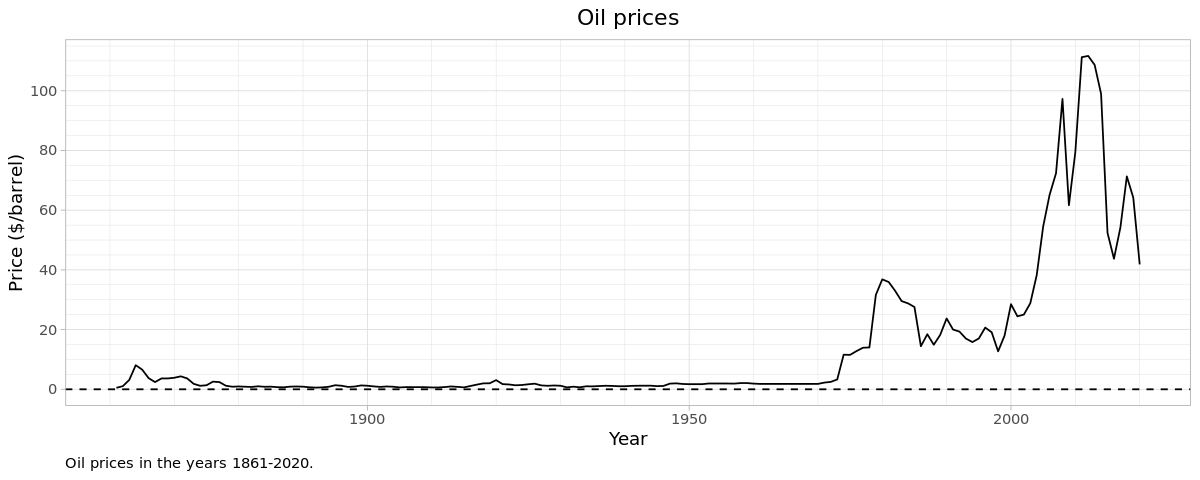

In [12]:
# Uncomment the required lines for the general template I made. It will be the same for all the plots.
fig(10,4)

prices_plot <- ggplot(oil.prices, aes(x=year, y=price)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 120, 20),
        minor_breaks = seq(0, 120, 5),
        ) +
    scale_x_continuous(
        breaks= seq(1850, 2025, 50),
        minor_breaks = seq(1850, 2025, 10),
        ) +
    labs(
        title="Oil prices",
        #subtitle = "Oil prices variations in the years",
        x = "Year",
        y = "Price ($/barrel)",
        fill = "Title",
        caption = "Oil prices in the years 1861-2020.",
        #tag = "Fig. 1",
        color = "Countries"
        ) +
    geom_hline(
        yintercept = 0,
        linetype = 2,
        color = 1,
        lwd = 0.5
        ) #+

print(prices_plot)



##### 2.3)
In the same way as it was done for the lakes, the dataframe is ordered with respect to price: the first row is the highest price.

In [13]:
# Ordering the dataframe by price and picking the first row.
oil.prices[order(-oil.prices$price), ][1,]
# So the highest price was 111.7$/barrel in 2012.

,country,code,year,price
,<chr>,<chr>,<int>,<dbl>
152,World,OWID_WRL,2012,111.6697


##### 2.4)
Adding a column to the dataframe, with the derivative calculated as suggested. However I used the backward derivative: ∂price(j)/∂year=price(j)−price(j-1). In this way, by putting a 0 for the derivative of the oldest price, I can store all the derivatives next to their price in the dataframe.


In [14]:
oil.prices$fwd_derivative = c(0, oil.prices$price[-1]-oil.prices$price[-length(oil.prices$price)])

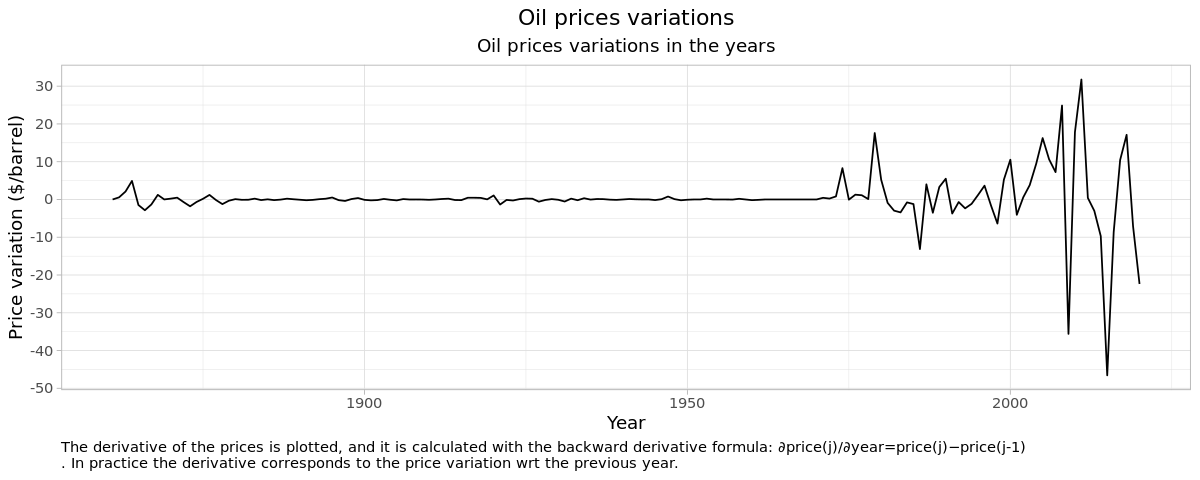

In [15]:
fig(10,4)

prices_plot <- ggplot(oil.prices, aes(x=year, y=fwd_derivative)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(-50, 30, 10),
        minor_breaks = seq(-50, 30, 5),
        ) +
    scale_x_continuous(
        breaks= seq(1850, 2025, 50),
        minor_breaks = seq(1850, 2025, 25),
        ) +
    labs(
        title="Oil prices variations",
        subtitle = "Oil prices variations in the years",
        x = "Year",
        y = "Price variation ($/barrel)",
        fill = "Title",
        caption = "The derivative of the prices is plotted, and it is calculated with the backward derivative formula: ∂price(j)/∂year=price(j)−price(j-1)\n. In practice the derivative corresponds to the price variation wrt the previous year.",
        #tag = "Fig. 1",
        color = "Countries"
        ) #+
    
print(prices_plot)


### Exercise 3 - World Coal Production
    • The following CSV file https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW · hour) for several countries in the World.
    1 Write R code that is able to read the file and import it in a tibble [4] structure.
    2 Count the number of countries available in the file and produce a barplot with the number of entries for each country.
    For the following items select only the years ≥ 1970:
    3 Selecting only the years after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions.
    4 For the 5 top Countries, create a plot of production as a function of time.
    5 Generate a plot with the cumulative sum of the World’s coal production over the years.

##### 3.1)
Using read_csv, the data is loaded as tibble.

In [16]:
coal.production <- read_csv("coal-production-by-country.csv")


Rows: 11528 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (2): Year, Coal production (TWh)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
colnames(coal.production) <- c('country', 'code', 'year', 'production')
coal.production[0:3,]

country,code,year,production
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0


##### 3.2)
Using the unnique() function, it is straightforward to know the number of available countries.  Then they are plotted in a barplot using ggplot2.

In [18]:
# Counting the countries
length(unique(coal.production$country))

[1] 200

In [19]:
country.counts <- data.frame(table(coal.production$country, dnn='country'))


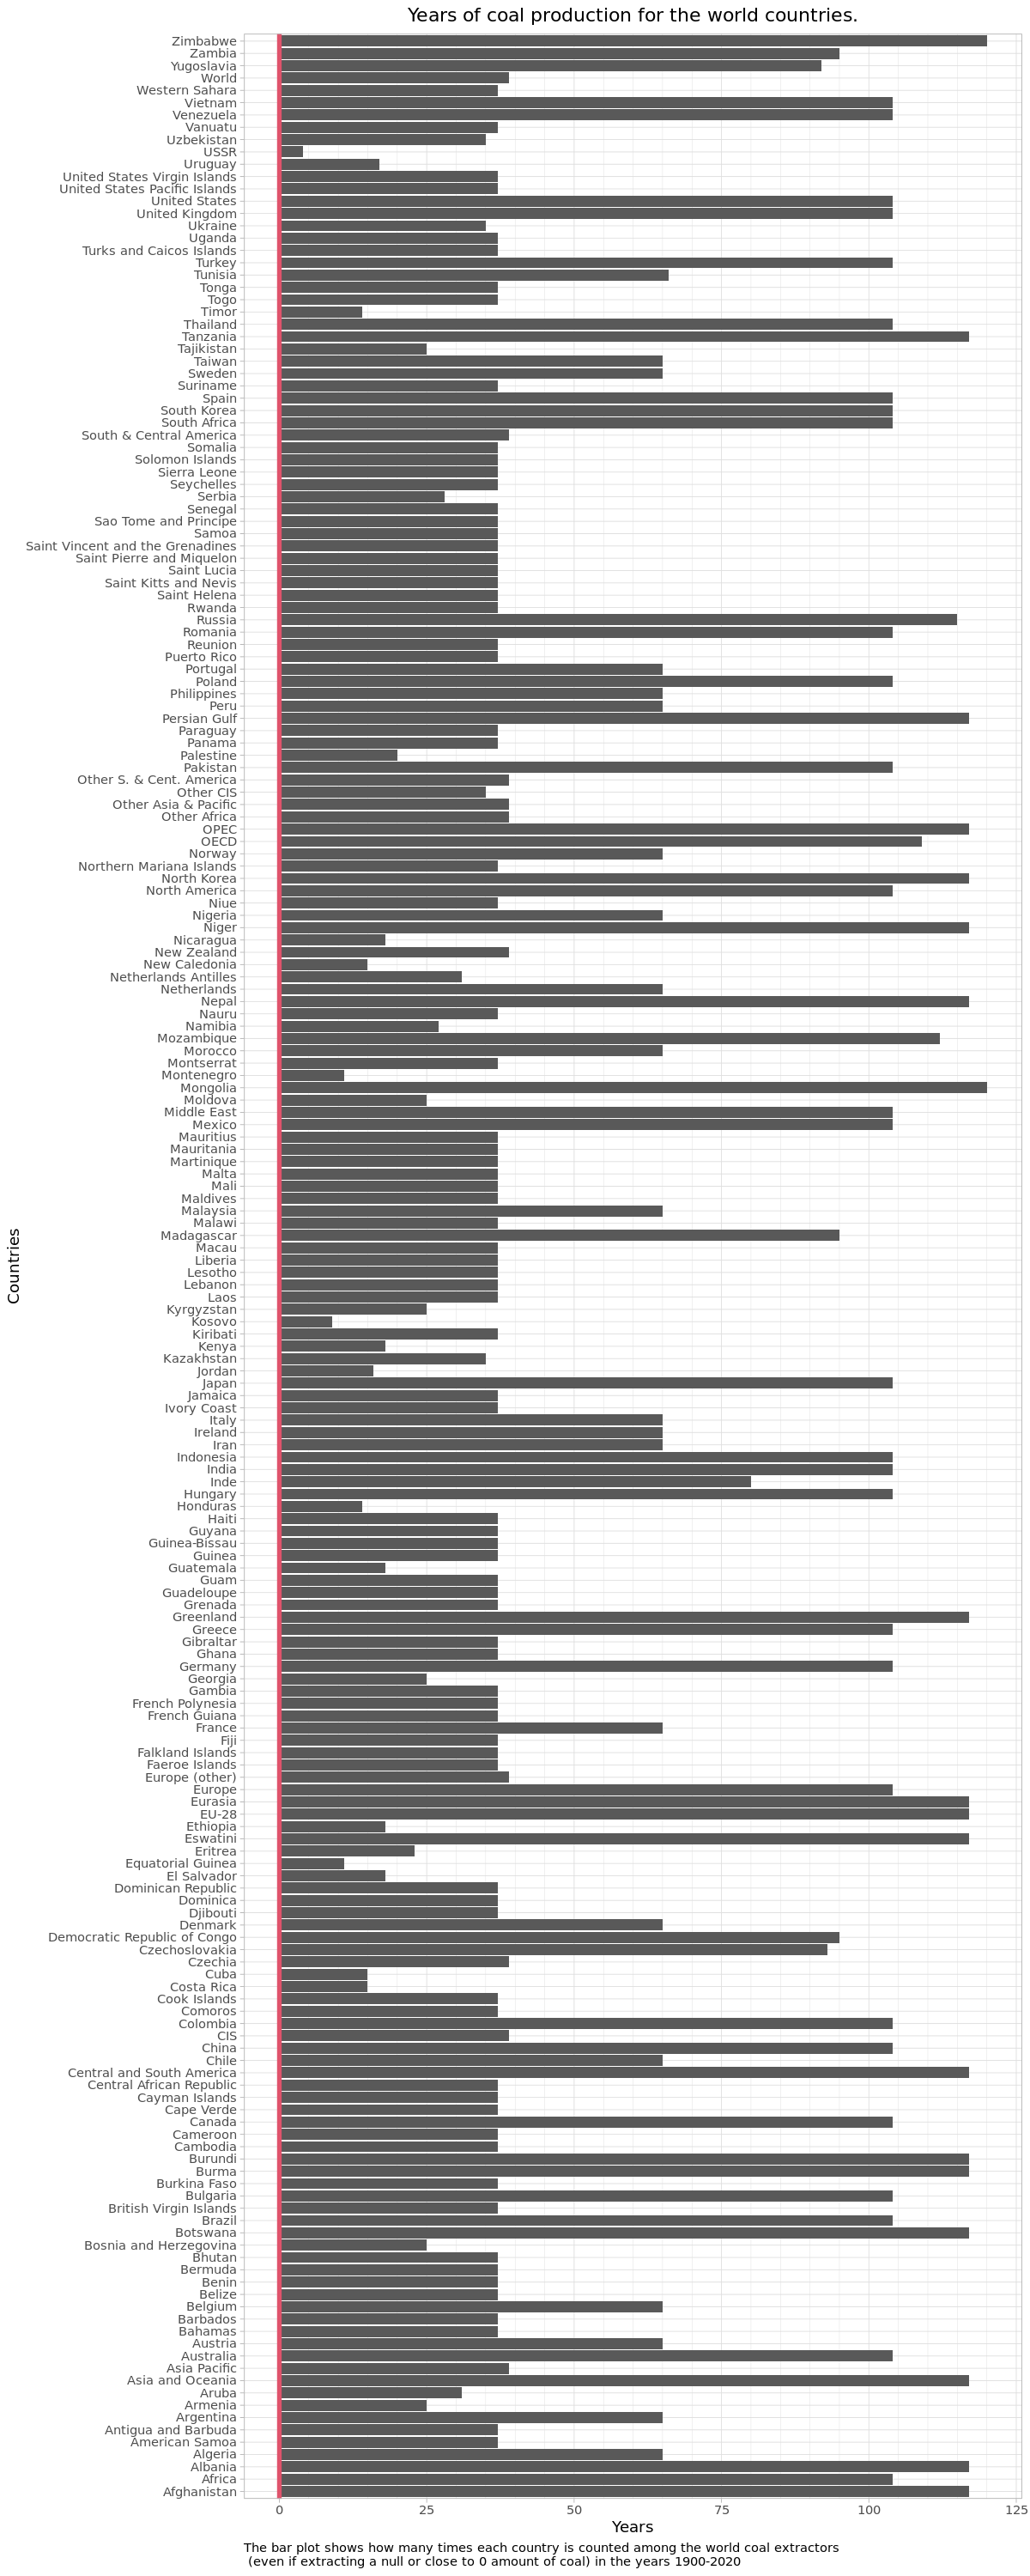

In [20]:
fig(10,25)
counts_plot <- ggplot(country.counts, aes(x=country, y=Freq)) + geom_bar(stat="identity") + 
    theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank()) + theme_bw(base_size = 10) +
    scale_y_continuous(breaks= seq(0, 150, 10))


counts_plot <- ggplot(country.counts, aes(x=country, y=Freq)) + 
    geom_bar(
        stat="identity"
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 200, 25),
        minor_breaks = seq(0, 200, 5),
        ) +
    labs(
        title="Years of coal production for the world countries.",
        #subtitle = "The bar plot shows how many times each country is counted among the world coal extractors\n (even if extracting a null or close to 0 amount of coal) in the years 1900-2019",
        x = "Countries",
        y = "Years",
        fill = "Title",
        caption = "The bar plot shows how many times each country is counted among the world coal extractors\n (even if extracting a null or close to 0 amount of coal) in the years 1900-2020",
        #tag = "Fig. 1",
        #color = "Countries"
        ) +
    geom_hline(
        yintercept = 0,
        linetype = 1,
        color = 2,
        lwd = 1.5
        )
    
# Horizontal bar plot
print(counts_plot + coord_flip())

##### 3.3)
The year is set to be > 1970, then a new dataframe is made, hostinng the cumulative production of each country. The dataframe is then ordered with respect to the new variable, and the first couple rows are shown.

In [21]:
recent.production <- coal.production[coal.production$year >= 1970,]

In [22]:
integrated.production <- aggregate(recent.production["production"], recent.production["country"], FUN=sum)
integrated.production[order(-integrated.production$production),][1:20,]

,country,production
,<chr>,<dbl>
176,World,1260113.24
9,Asia Pacific,690240.47
8,Asia and Oceania,685960.04
32,China,459564.65
120,OECD,438441.38
117,North America,244443.42
166,United States,226068.84
51,Eurasia,161580.48
50,EU-28,150743.35


##### 3.4)
In the first results appear a lot of macroregions, however the first 5 countries are China, US, Russia, Australia, India. A multi line plot is done with ggplot2, where a parameter "colour" in the aestetics differentiates in the graph the lines corresponding to different countries.\
Data appears to be complete for all countries only starting from 1981, this is highlited in the plot with a red line.

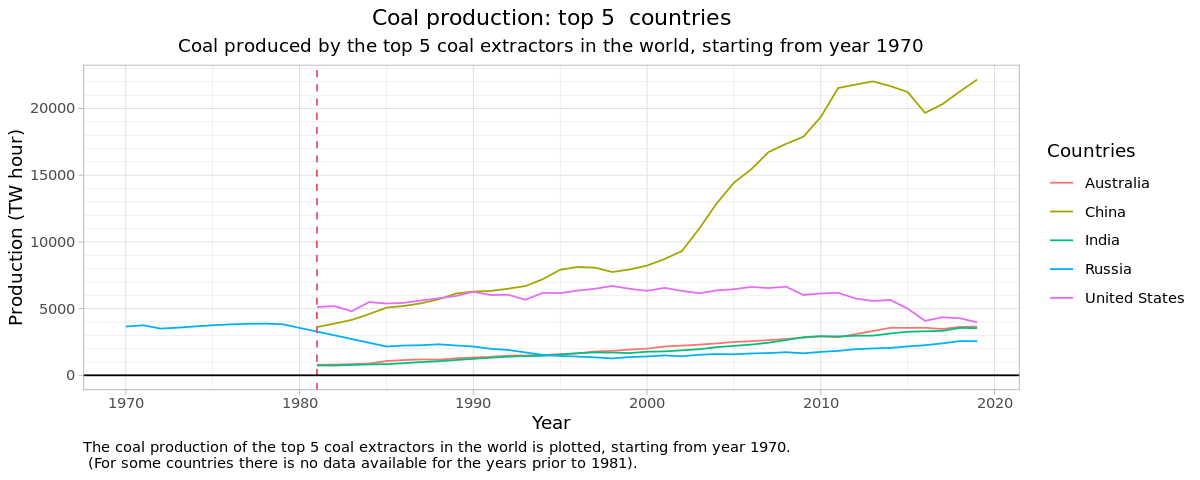

In [23]:
fig(10,4)

production_plot <- ggplot(recent.production[recent.production$country %in% c('China', 'United States', 'Russia', 'Australia', 'India'),], aes(x=year, y=production, colour=country)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 25e+03, 5e+03),
        minor_breaks = seq(0, 25e+03, 1e+03),
        ) +
    scale_x_continuous(
        breaks= seq(1970, 2020, 10),
        minor_breaks = seq(1970, 2020, 5),
        ) +
    labs(
        title="Coal production: top 5  countries",
        subtitle = "Coal produced by the top 5 coal extractors in the world, starting from year 1970",
        x = "Year",
        y = "Production (TW hour)",
        fill = "Title",
        caption = "The coal production of the top 5 coal extractors in the world is plotted, starting from year 1970.\n (For some countries there is no data available for the years prior to 1981).",
        #tag = "Fig. 1",
        color = "Countries"
        ) +
    geom_vline(
        xintercept = 1981,
        linetype = 2,
        color = 2
        ) +
    geom_hline(
        yintercept = 0,
        linetype = 1,
        color = 1,
        lwd = 0.5
        ) #+
    

print(production_plot)


##### 3.5)
The cumulative plot is done in a similar way to the previous graph. The only country selected is "world", and the cumulative sum is done directly inside the aestetics.

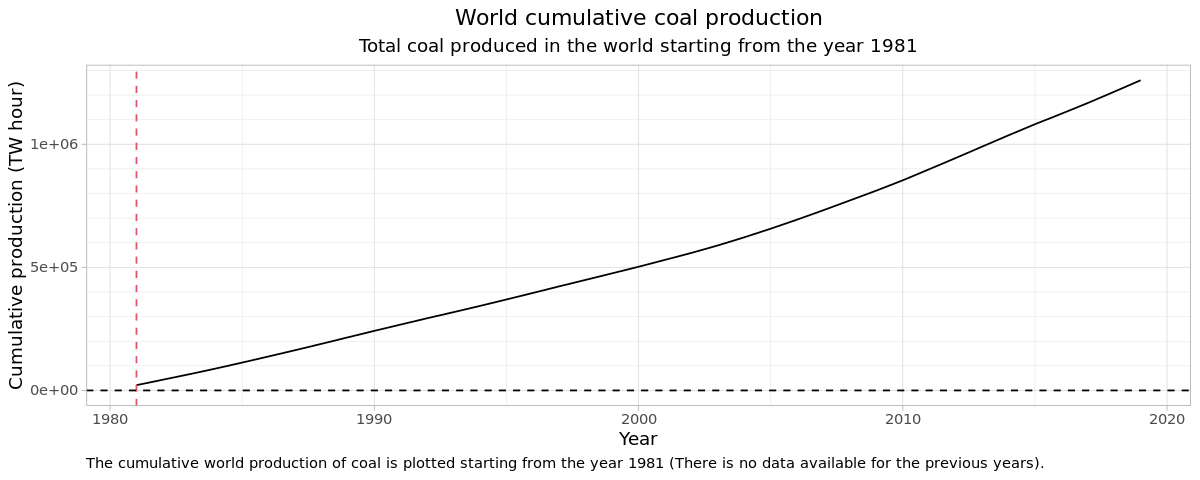

In [24]:
fig(10,4)

cumulative_production_plot <- ggplot(recent.production[recent.production$country == "World",], aes(x=year, y=cumsum(production))) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 25e+05, 5e+05),
        minor_breaks = seq(0, 25e+05, 1e+05),
        ) +
    scale_x_continuous(
        breaks= seq(1970, 2020, 10),
        minor_breaks = seq(1970, 2020, 5),
        ) +
    labs(
        title="World cumulative coal production",
        subtitle = "Total coal produced in the world starting from the year 1981",
        x = "Year",
        y = "Cumulative production (TW hour)",
        fill = "Title",
        caption = "The cumulative world production of coal is plotted starting from the year 1981 (There is no data available for the previous years).",
        #color = "Users By labs",
        #tag = "Fig. 1",
        ) +
    geom_vline(
        xintercept = 1981,
        linetype = 2,
        color = 2
        ) +
    geom_hline(
        yintercept = 0,
        linetype = 2,
        color = 1,
        lwd = 0.5
        ) #+
    
    
print(cumulative_production_plot)

### Exercise 4 - Covid19 Vaccine data
    • The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv contains a summary on the vaccination data grouped by Vaccine type and Country.
    1 filter() the original tibble by selecting the following countries: Italy.
    2 Plot the number of vaccines given as a function of time for the different vaccine manufacturer.
    3 From the same tibble plot the total number of vaccines shot per day in Italy.
    4 Do the same exercise for the following countries: Germany and United States of America.
    • The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, ...) and international aggregates (World, continents, European Union ldots). They can be identified by their iso code that starts with OWID.
    1 Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date.
    2 Study the data structure and produce few relevant plots of your taste.

##### 4.1-4.2-4.3-4.4)
Loading the data from the csv and filtering for Italy. Then the total number of vaccines is plotted for each day, divided by brand. The daily vaccinations are computed by using the backward derivative on the total vaccinations distribution. It is interesting to see the drop in number of vaccinations during each weekend.

In [25]:
vaccinations.manufacturer <- read.csv("vaccinations-by-manufacturer.csv", header=T)
vaccinations.manufacturer[1:3,]

,location,date,vaccine,total_vaccinations
,<chr>,<chr>,<chr>,<int>
1,Argentina,2020-12-29,Moderna,2
2,Argentina,2020-12-29,Oxford/AstraZeneca,5
3,Argentina,2020-12-29,Sinopharm/Beijing,1


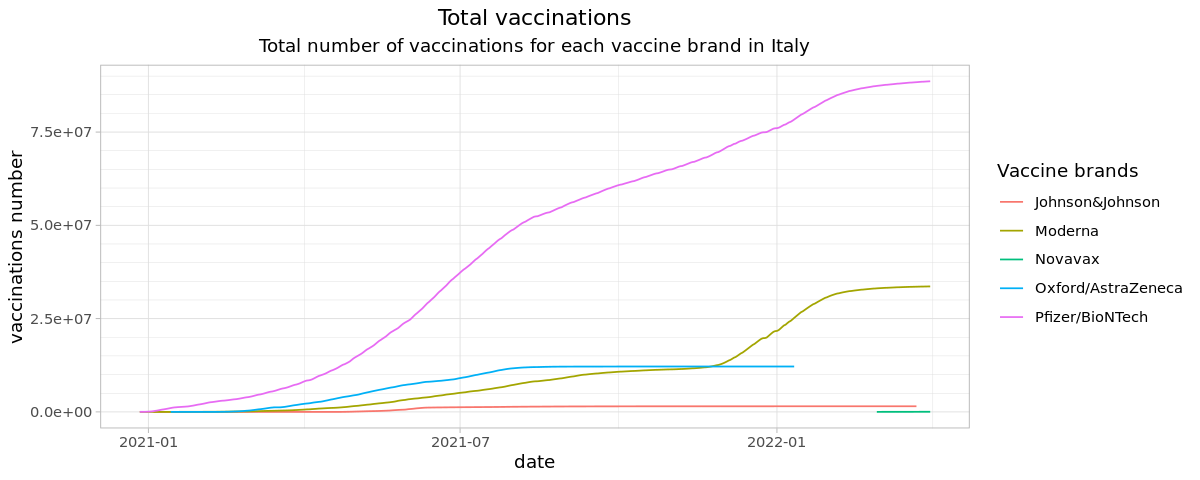

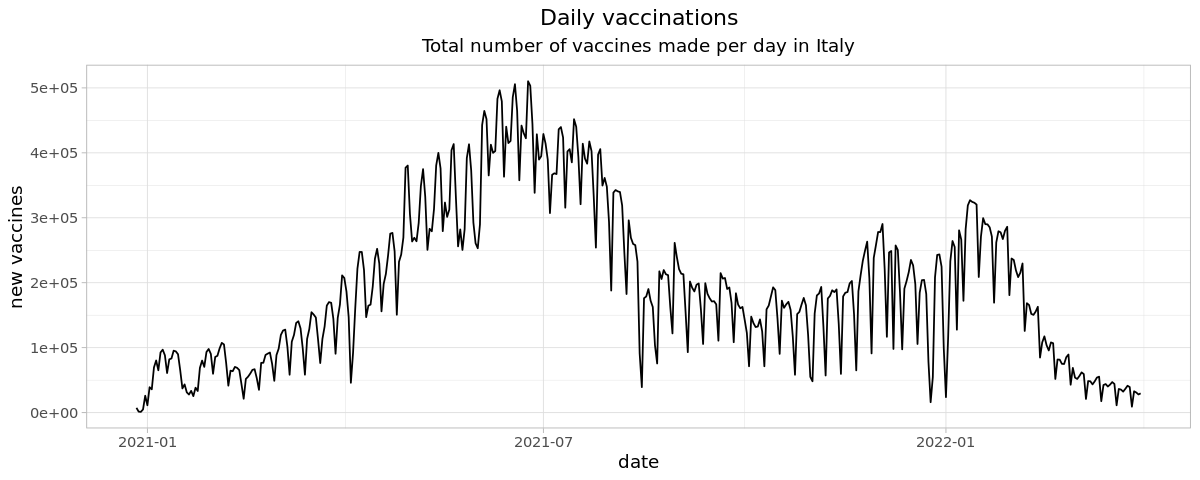

In [26]:
vax_ita.manuf <- filter(vaccinations.manufacturer, location == "Italy")

vax_ita.manuf$date <- as.POSIXct(vax_ita.manuf$date)

fig(10, 4)
vaccine_plot <- ggplot(vax_ita.manuf, aes(x=date, y=total_vaccinations, colour=vaccine)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 10e+07, 2.5e+07),
        minor_breaks = seq(0, 10e+07, 5e+06),
        ) +
    labs(
        title="Total vaccinations",
        subtitle = "Total number of vaccinations for each vaccine brand in Italy",
        x = "date",
        y = "vaccinations number",
        fill = "Title",
        #caption = ""
        #tag = "Fig. 1",
        color = "Vaccine brands"
        )
print(vaccine_plot)

vax_ita.manuf$bkd_derivative = c(0, vax_ita.manuf$total_vaccinations[-1]-vax_ita.manuf$total_vaccinations[-length(vax_ita.manuf$total_vaccinations)])
daily.vax = aggregate(vax_ita.manuf$bkd_derivative, list(vax_ita.manuf$date), FUN=sum)

fig(10,4)

dailyvax_plot <- ggplot(daily.vax, aes(x=Group.1, y=x)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    #scale_y_continuous(
    #    breaks= seq(-50, 30, 10),
    #    minor_breaks = seq(-50, 30, 5),
    #    ) +
    labs(
        title="Daily vaccinations",
        subtitle = "Total number of vaccines made per day in Italy",
        x = "date",
        y = "new vaccines",
        fill = "Title",
        #caption = "The derivative of the prices is plotted, and it is calculated with the backward derivative formula: ∂price(j)/∂year=price(j)−price(j-1)\n. In practice the derivative corresponds to the price variation wrt the previous year.",
        #tag = "Fig. 1",
        color = "Vaccine brands"
        ) #+
    
print(dailyvax_plot)

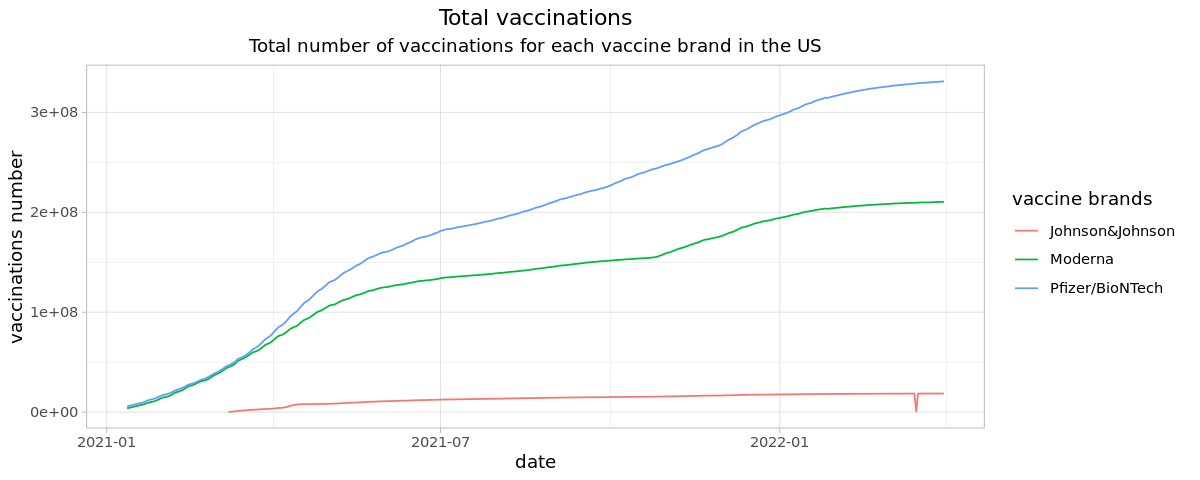

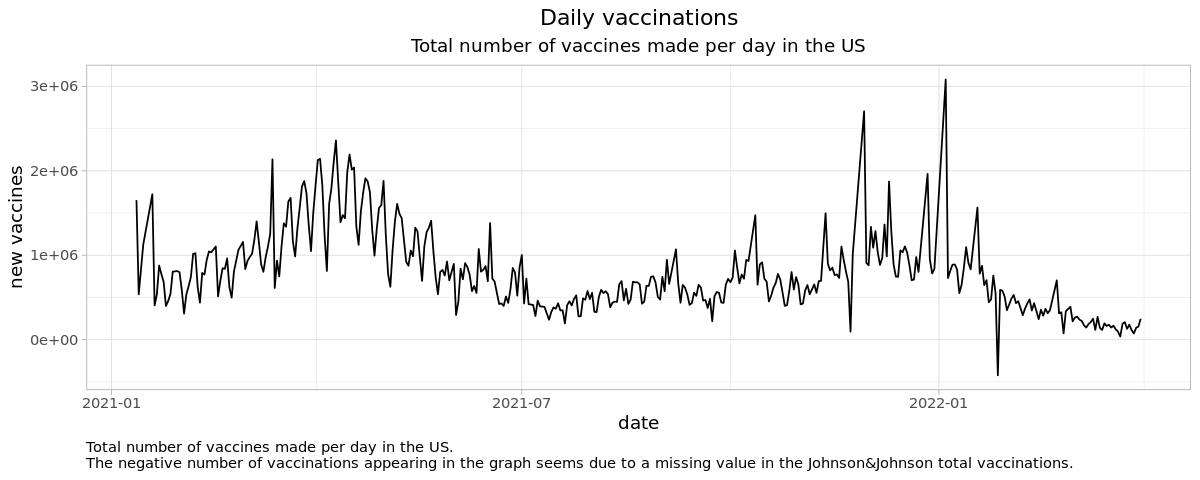

In [27]:
vax_US.manuf <- filter(vaccinations.manufacturer, location == "United States")

vax_US.manuf$date <- as.POSIXct(vax_US.manuf$date)

fig(10, 4)
vaccine_plot <- ggplot(vax_US.manuf, aes(x=date, y=total_vaccinations, colour=vaccine)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    labs(
        title="Total vaccinations",
        subtitle = "Total number of vaccinations for each vaccine brand in the US",
        x = "date",
        y = "vaccinations number",
        fill = "Title",
        #caption = ""
        #tag = "Fig. 1",
        color = "vaccine brands"
        )
print(vaccine_plot)

vax_US.manuf$bkd_derivative = c(0, vax_US.manuf$total_vaccinations[-1]-vax_US.manuf$total_vaccinations[-length(vax_US.manuf$total_vaccinations)])
daily.vax = aggregate(vax_US.manuf$bkd_derivative, list(vax_US.manuf$date), FUN=sum)

fig(10,4)

dailyvax_plot <- ggplot(daily.vax, aes(x=Group.1, y=x)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    #scale_y_continuous(
    #    breaks= seq(-50, 30, 10),
    #    minor_breaks = seq(-50, 30, 5),
    #    ) +
    labs(
        title="Daily vaccinations",
        subtitle = "Total number of vaccines made per day in the US",
        x = "date",
        y = "new vaccines",
        fill = "Title",
        caption = "Total number of vaccines made per day in the US. \nThe negative number of vaccinations appearing in the graph seems due to a missing value in the Johnson&Johnson total vaccinations.",
        #tag = "Fig. 1",
        color = "Countries"
        ) #+
    
print(dailyvax_plot)

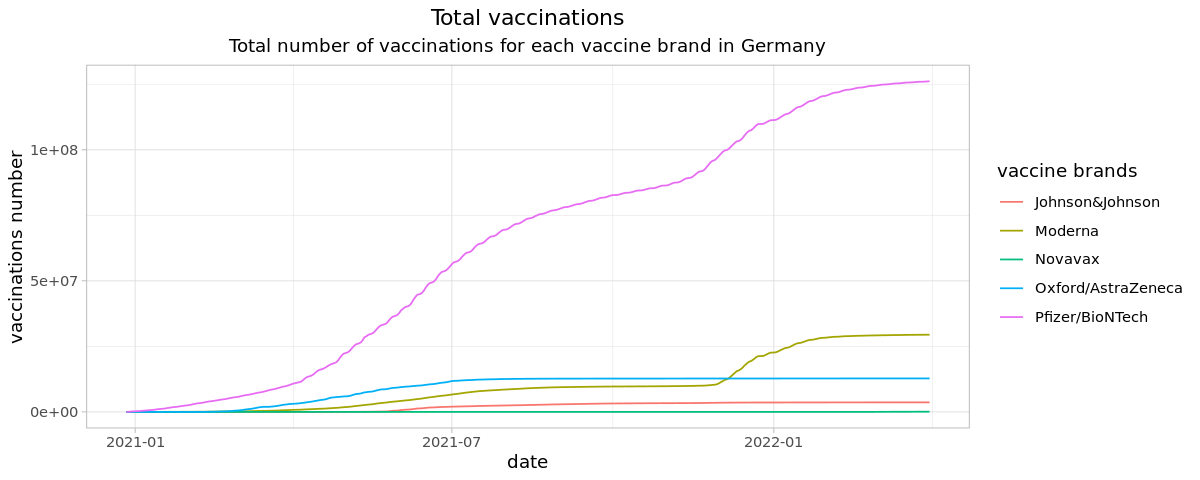

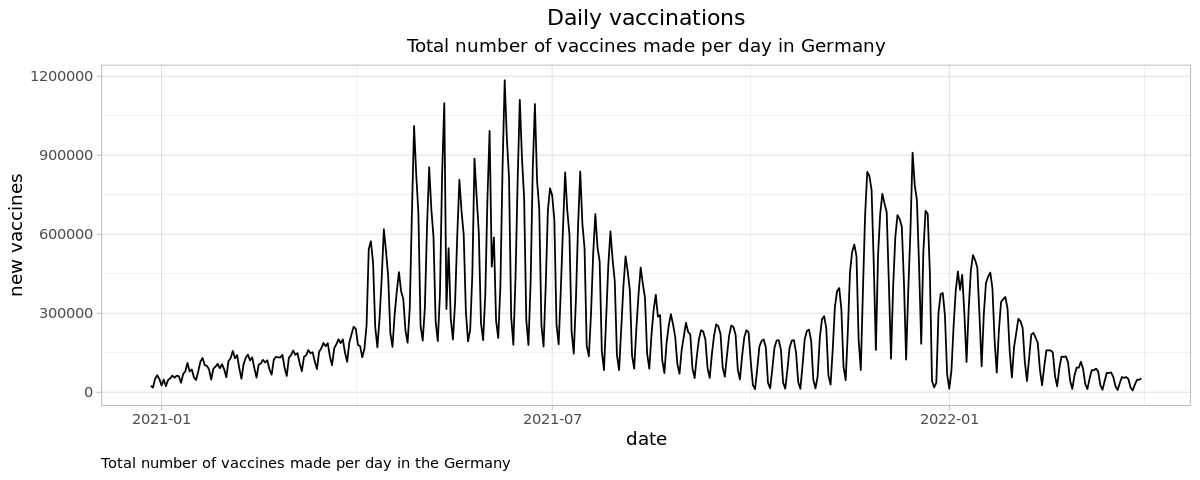

In [28]:
vax_DE.manuf <- filter(vaccinations.manufacturer, location == "Germany")

vax_DE.manuf$date <- as.POSIXct(vax_DE.manuf$date)

fig(10, 4)
vaccine_plot <- ggplot(vax_DE.manuf, aes(x=date, y=total_vaccinations, colour=vaccine)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    labs(
        title="Total vaccinations",
        subtitle = "Total number of vaccinations for each vaccine brand in Germany",
        x = "date",
        y = "vaccinations number",
        fill = "Title",
        #caption = ""
        #tag = "Fig. 1",
        color = "vaccine brands"
        )
print(vaccine_plot)

vax_DE.manuf$bkd_derivative = c(0, vax_DE.manuf$total_vaccinations[-1]-vax_DE.manuf$total_vaccinations[-length(vax_DE.manuf$total_vaccinations)])
daily.vax = aggregate(vax_DE.manuf$bkd_derivative, list(vax_DE.manuf$date), FUN=sum)

fig(10,4)

dailyvax_plot <- ggplot(daily.vax, aes(x=Group.1, y=x)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    labs(
        title="Daily vaccinations",
        subtitle = "Total number of vaccines made per day in Germany",
        x = "date",
        y = "new vaccines",
        fill = "Title",
        caption = "Total number of vaccines made per day in the Germany",
        #tag = "Fig. 1",
        color = "Countries"
        ) #+
    
print(dailyvax_plot)

##### 4.5)
Loading the csv vaccinations. All the locations are then shown, in order to select the european countries. The new dataframe of european countries is used to plot the daily vaccinations per million of people.

In [29]:
vaccinations <- read.csv("vaccinations.csv", header=T)
vaccinations[1:5,]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
2,Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
3,Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
4,Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
5,Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003


In [30]:
location.counts <- data.frame(table(vaccinations.manufacturer$location, dnn='location'))
location.counts

location,Freq
<fct>,<int>
Argentina,2641
Austria,325
Belgium,325
Bulgaria,239
Chile,1525
Croatia,256
Cyprus,235
Czechia,1669
Denmark,254


In [31]:
vax.EU <- filter(vaccinations, location %in% c("Austria", "Belgium", "Bulagaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Liechtenstein", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"))

In [32]:
vax.EU[100:105,]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
100,Austria,AUT,2021-04-17,NA,NA,NA,NA,NA,53338,NA,NA,NA,NA,5898,40057,0.443
101,Austria,AUT,2021-04-18,NA,NA,NA,NA,NA,52882,NA,NA,NA,NA,5848,40377,0.446
102,Austria,AUT,2021-04-19,NA,NA,NA,NA,NA,52427,NA,NA,NA,NA,5797,40697,0.450
103,Austria,AUT,2021-04-20,NA,NA,NA,NA,NA,51972,NA,NA,NA,NA,5747,41018,0.454
104,Austria,AUT,2021-04-21,NA,NA,NA,NA,NA,51517,NA,NA,NA,NA,5697,41338,0.457
105,Austria,AUT,2021-04-22,NA,NA,NA,NA,NA,51062,NA,NA,NA,NA,5647,41658,0.461


In [33]:
length(unique(vax.EU$location))

[1] 27

Warning message:
“Removed 41 row(s) containing missing values (geom_path).”


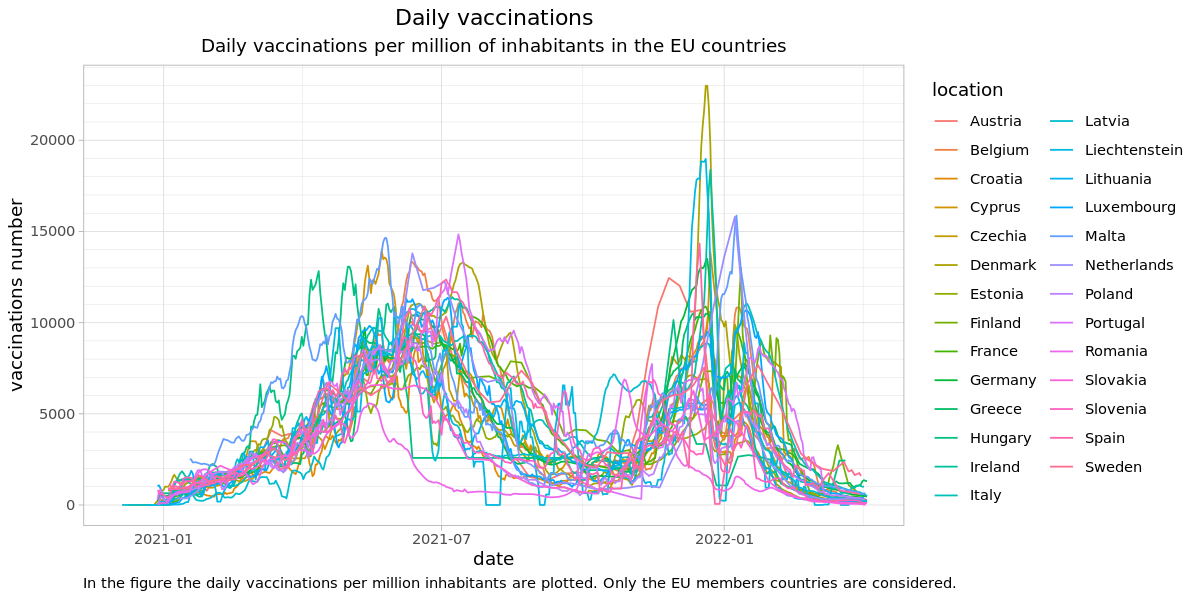

In [34]:
vax.EU$date <- as.POSIXct(vax.EU$date)

fig(10, 5)
vaccine_plot <- ggplot(vax.EU, aes(x=date, y=daily_vaccinations_per_million, colour=location)) +
    geom_line(
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 0.5
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    scale_y_continuous(
        breaks= seq(0, 25000, 5000),
        minor_breaks = seq(0, 25000, 1000),
        #limits=c(-500000,500000)
        ) +
    labs(
        title="Daily vaccinations",
        subtitle = "Daily vaccinations per million of inhabitants in the EU countries",
        x = "date",
        y = "vaccinations number",
        fill = "Title",
        caption = "In the figure the daily vaccinations per million inhabitants are plotted. Only the EU members countries are considered."
        #tag = "Fig. 1",
        #color = "Vaccine brands"
        )
print(vaccine_plot)

##### 4.6)
The same dataframe of european countries is used to produce a streamgraph. It has the same information of the previous plot, but arranged in such a way that it is easier to notice and compare the effort of each country.

Then there is a second graph. It keeps the same layout, but plotting the absolute number of vaccinations instead of the numbers per million inhabitants. The idea was to check if there were two peaks of vaccinations during the peaks of the covid waves, as the other two graphs could suggest.

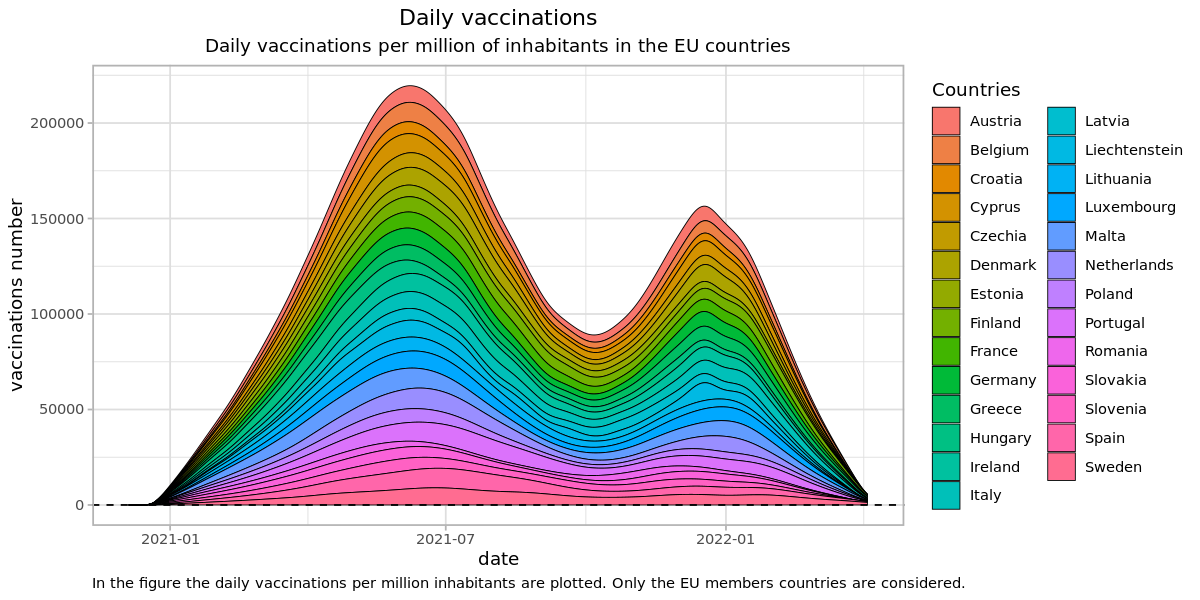

In [35]:
fig(10, 5)
ggplot(vax.EU, aes(x = date, y = daily_vaccinations_per_million, fill = location)) +
    geom_stream(
        type = "ridge", 
        color = 1, 
        lwd = 0.25,
        bw = 1
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 1,
        base_rect_size = 1
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    #scale_y_continuous(
    #    breaks= seq(0, 25000, 5000),
    #    minor_breaks = seq(0, 25000, 1000),
    #    limits=c(-500000,500000)
    #    ) +
    labs(
        title="Daily vaccinations",
        subtitle = "Daily vaccinations per million of inhabitants in the EU countries",
        x = "date",
        y = "vaccinations number",
        fill = "Countries",
        caption = "In the figure the daily vaccinations per million inhabitants are plotted. Only the EU members countries are considered."
        #tag = "Fig. 1",
        #color = "Vaccine brands"
        ) +
    geom_hline(
        yintercept = 0,
        linetype = 2,
        color = 1,
        lwd = 0.5
        ) #+

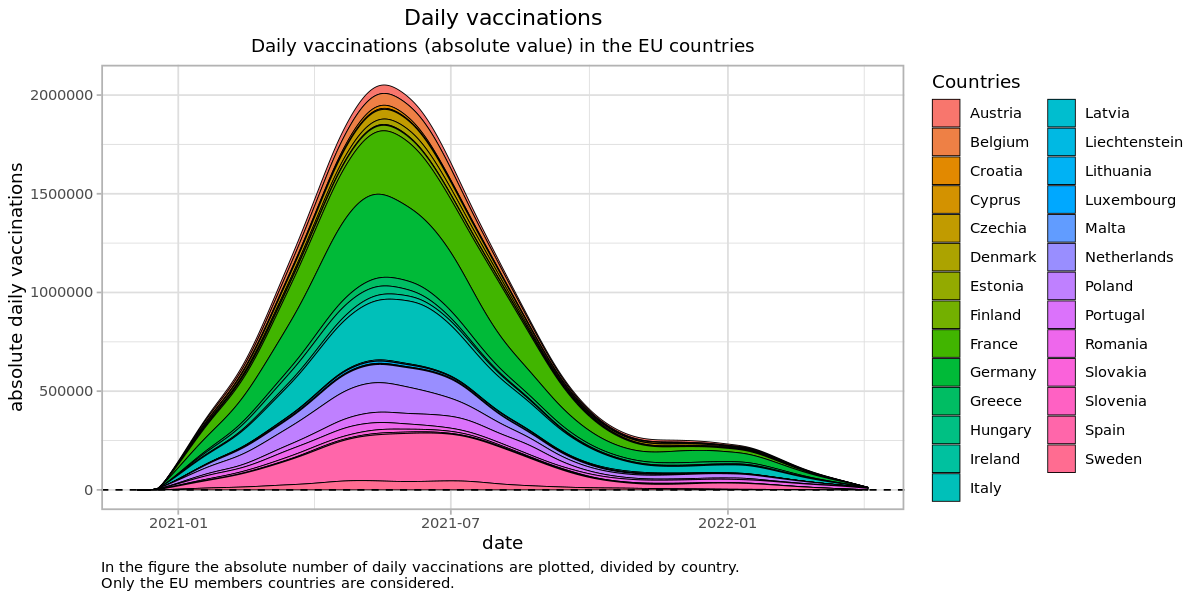

In [36]:
fig(10, 5)
ggplot(vax.EU, aes(x = date, y = daily_people_vaccinated, fill = location)) +
    geom_stream(
        type = "ridge", 
        color = 1, 
        lwd = 0.25,
        bw = 1
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 1,
        base_rect_size = 1
        ) +
    theme(
        #panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
        #panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
        #panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
        #panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        #legend.position = c(0.2, 0.8),
        #legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
        #legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
        #legend.key.size = unit(1, units = "cm"),
        #plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        #panel.background = element_rect(fill = "#67c9ff"),
        #panel.border = element_rect(fill = "transparent", color = 4, size = 2),
        #plot.background = element_rect(fill = "gray86"),
        #plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
        #plot.tag.position = "bottomright",
        ) + 
    labs(
        title="Daily vaccinations",
        subtitle = "Daily vaccinations (absolute value) in the EU countries",
        x = "date",
        y = "absolute daily vaccinations",
        fill = "Countries",
        caption = "In the figure the absolute number of daily vaccinations are plotted, divided by country. \nOnly the EU members countries are considered."
        #tag = "Fig. 1",
        #color = "Vaccine brands"
        )+
    geom_hline(
        yintercept = 0,
        linetype = 2,
        color = 1,
        lwd = 0.5
        ) #+


It is interesting to see from this last graph, that there wasn't an increment of vaccinations in europe during the second covid wave, on the contrary of what the previous graphs could have suggested. Apparently, only the smallest countries registered a big increment in vaccinations during the beginning of 2022 (leading to the second peak in the previous graphs), while the most populated countries did not.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f2103c97-d2c8-4e04-895f-d540db8f4f65' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>